# Import libraries
---

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf

# Read data
---

In [39]:
df_btc_usd = yf.download('BTC-USD', start='2025-01-01')

display(df_btc_usd)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2025-01-01,94419.757812,94929.867188,92788.125000,93425.101562,24519888919
2025-01-02,96886.875000,97739.820312,94201.570312,94416.289062,46009564411
2025-01-03,98107.429688,98956.914062,96034.617188,96881.726562,35611391163
2025-01-04,98236.226562,98734.429688,97562.976562,98106.992188,22342608078
2025-01-05,98314.960938,98813.304688,97291.765625,98233.906250,20525254825
...,...,...,...,...,...
2025-07-06,109232.070312,109731.625000,107847.015625,108231.187500,36746020463
2025-07-07,108299.851562,109710.250000,107527.054688,109235.328125,45415696597


In [40]:
df_btc_usd.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

df_btc_usd['Adj Close'] = df_btc_usd['Close']

df_btc_usd = df_btc_usd.reset_index().rename(columns={'index': 'Date'})

In [41]:
df_btc_usd

,Date,Close,High,Low,Open,Volume,Adj Close
0,2025-01-01,94419.757812,94929.867188,92788.125000,93425.101562,24519888919,94419.757812
1,2025-01-02,96886.875000,97739.820312,94201.570312,94416.289062,46009564411,96886.875000
2,2025-01-03,98107.429688,98956.914062,96034.617188,96881.726562,35611391163,98107.429688
3,2025-01-04,98236.226562,98734.429688,97562.976562,98106.992188,22342608078,98236.226562
4,2025-01-05,98314.960938,98813.304688,97291.765625,98233.906250,20525254825,98314.960938
...,...,...,...,...,...,...,...
186,2025-07-06,109232.070312,109731.625000,107847.015625,108231.187500,36746020463,109232.070312
187,2025-07-07,108299.851562,109710.250000,107527.054688,109235.328125,45415696597,108299.851562
188,2025-07-08,108950.273438,109198.968750,107499.554688,108298.226562,44282204127,108950.273438
189,2025-07-09,111326.554688,111925.375000,108357.679688,108950.273438,57927418065,111326.554688


# Data treatment
---

In [42]:
# Check data type

df_btc_usd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       191 non-null    datetime64[ns]
 1   Close      191 non-null    float64       
 2   High       191 non-null    float64       
 3   Low        191 non-null    float64       
 4   Open       191 non-null    float64       
 5   Volume     191 non-null    int64         
 6   Adj Close  191 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 10.6 KB


In [43]:
df_btc_usd['Date'] = pd.to_datetime(df_btc_usd['Date'])

Adjusted Close - Reflects real market value changes, considering splits or dividends

Percentage Change - Refers to the percentage change in a stock’s price

In [44]:
# Add Percent Change on the df

df_btc_usd['Auto_pct'] = df_btc_usd['Adj Close'].pct_change()

In [45]:
min_date = min(df_btc_usd['Date'])
max_date = max(df_btc_usd['Date'])

print(f'Min Date: {min_date}')
print(f'Max Date: {max_date}')

Min Date: 2025-01-01 00:00:00
Max Date: 2025-07-11 00:00:00


In [46]:
# Checking null values

df_btc_usd.isnull().sum()

Date         0
Close        0
High         0
Low          0
Open         0
Volume       0
Adj Close    0
Auto_pct     1
dtype: int64

Auto_pct contains 1 null values of the first row, It's ok, but we'll remove

In [47]:
df_btc_usd = df_btc_usd.dropna()

# Data Analytics
---

## Statistical describe

In [48]:
df_btc_usd_describe = df_btc_usd.describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99])

display(df_btc_usd_describe)

,Date,Close,High,Low,Open,Volume,Adj Close,Auto_pct
count,190,190.000000,190.000000,190.000000,190.000000,1.900000e+02,190.000000,190.000000
mean,2025-04-06 12:07:34.736841984,96770.043586,98301.887870,94947.301439,96679.553906,4.442128e+10,96770.043586,0.001381
min,2025-01-02 00:00:00,76271.953125,80823.890625,74436.679688,76273.562500,9.863214e+09,76271.953125,-0.086820
1%,2025-01-03 21:21:36,78497.073281,82526.924297,76021.104766,78490.595703,1.271366e+10,78497.073281,-0.063475
25%,2025-02-18 06:00:00,87188.375000,88796.863281,85169.748047,87194.664062,2.929000e+10,87188.375000,-0.010831
50%,2025-04-06 12:00:00,96977.511719,98750.812500,95931.976562,96914.398438,4.419645e+10,96977.511719,0.000743
75%,2025-05-23 18:00:00,104727.650391,106176.185547,103276.886719,104710.175781,5.470215e+10,104727.650391,0.011525
99%,2025-07-08 02:38:24,111364.694609,111930.302656,108796.077891,110447.891406,1.053471e+11,111364.694609,0.069321
max,2025-07-11 00:00:00,116005.835938,116021.031250,115305.195312,115984.171875,1.262797e+11,116005.835938,0.095505
std,NaN,9331.652427,9094.023243,9517.569866,9273.876591,2.014664e+10,9331.652427,0.024487


In [49]:
for i in ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Auto_pct']:
    
    print(f'Column >> {i}')
    print(f"Min to 1% difference = {((df_btc_usd_describe.at['1%', i]/df_btc_usd_describe.at['min', i])-1)*100} %")    
    print(f"99% to Max difference = {((df_btc_usd_describe.at['max', i]/df_btc_usd_describe.at['99%', i])-1)*100} %")
    print('-'*50)

Column >> Open
Min to 1% difference = 2.9066863149666 %
99% to Max difference = 5.012572352682088 %
--------------------------------------------------
Column >> High
Min to 1% difference = 2.107091923818172 %
99% to Max difference = 3.654710562440866 %
--------------------------------------------------
Column >> Low
Min to 1% difference = 2.128554208458433 %
99% to Max difference = 5.982860364156473 %
--------------------------------------------------
Column >> Close
Min to 1% difference = 2.917350434966992 %
99% to Max difference = 4.167515876018291 %
--------------------------------------------------
Column >> Adj Close
Min to 1% difference = 2.917350434966992 %
99% to Max difference = 4.167515876018291 %
--------------------------------------------------
Column >> Volume
Min to 1% difference = 28.89975818968564 %
99% to Max difference = 19.870084125594012 %
--------------------------------------------------
Column >> Auto_pct
Min to 1% difference = -26.889118500189458 %
99% to Max d

All price variables: Open, High, Low, Close, Adj Close have close percentage variability, what's expect.

The Volume variable, have huge differences between Min - 1% and 99% - Max values. That's indicate high variability on trading numbers.

The Auto_pct variable, have big differences between Min - 1% and 99% - Max values. That's indicate that a significant devaluation and valuation in specific days.

## Line plot of High and Low Price (USD) over time

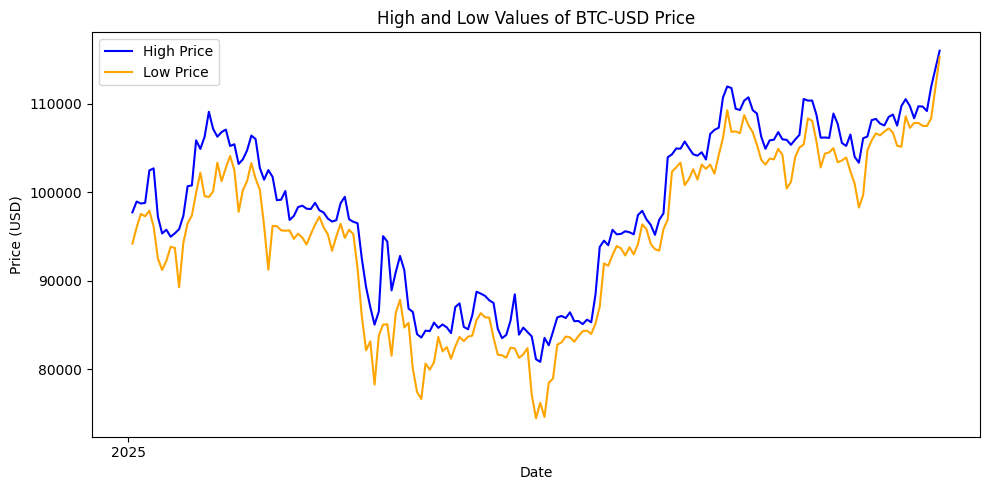

In [50]:
plt.figure(figsize=(10, 5))

plt.plot(df_btc_usd['Date'], df_btc_usd['High'], label='High Price', color='blue')
plt.plot(df_btc_usd['Date'], df_btc_usd['Low'], label='Low Price', color='orange')

plt.title('High and Low Values of BTC-USD Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.legend()
plt.grid(False)
plt.tight_layout()

plt.show()

## Bar plot of Daily Percentage Change over time

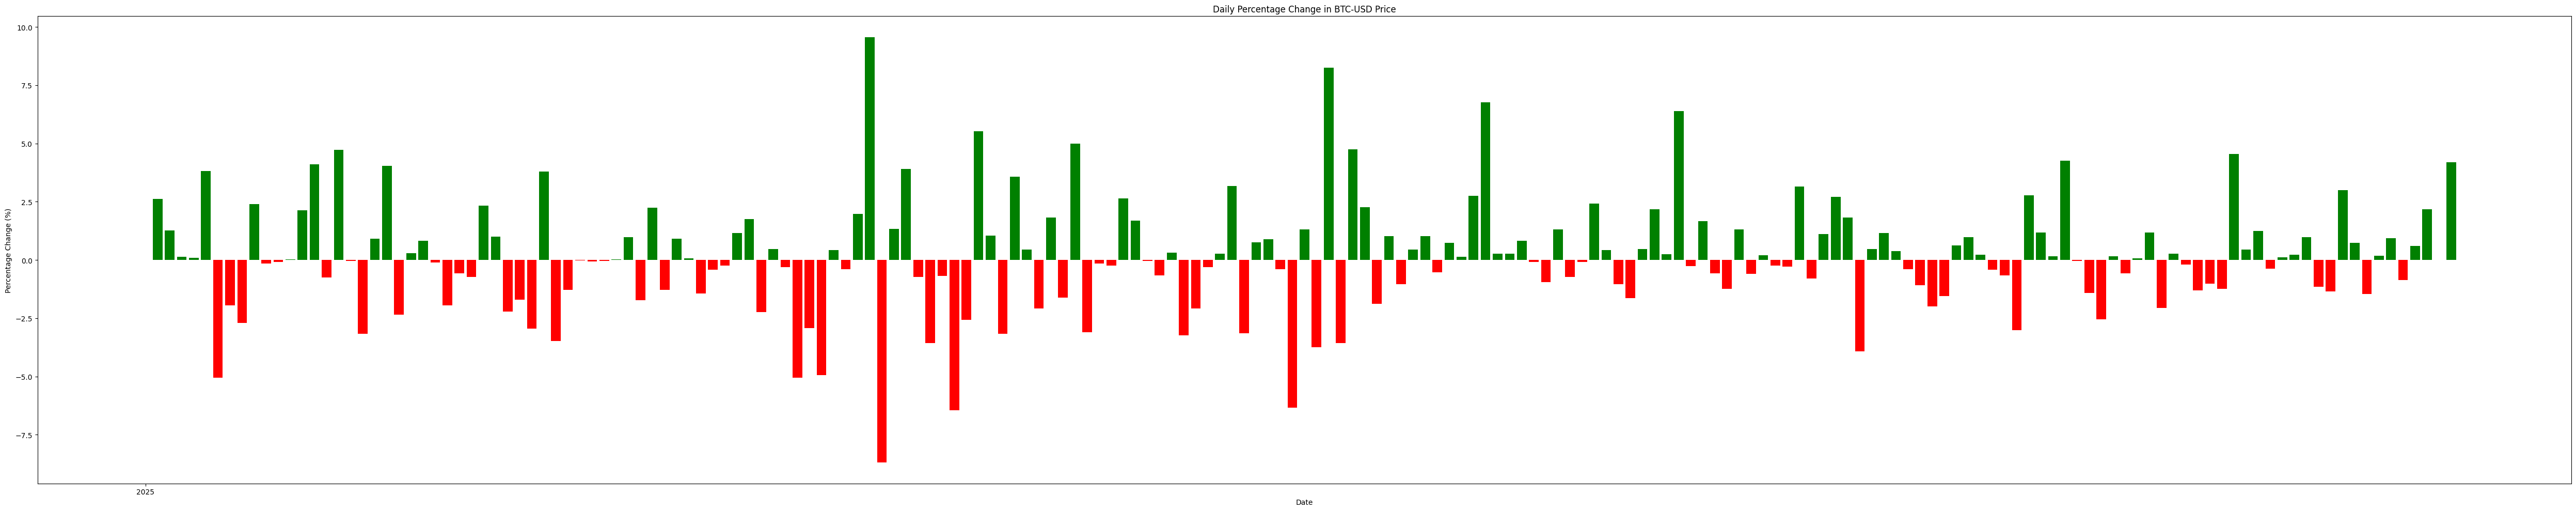

In [51]:
plt.figure(figsize=(50, 10))

colors = df_btc_usd['Auto_pct'].apply(lambda x: 'green' if x > 0 else 'red')

plt.bar(df_btc_usd['Date'], (df_btc_usd['Auto_pct'])*100, color=colors)

plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.title('Daily Percentage Change in BTC-USD Price')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()

plt.show()

In [52]:
min_auto_pct = min(df_btc_usd['Auto_pct'])
row_df_min_auto_pct = df_btc_usd.loc[df_btc_usd['Auto_pct'] == min_auto_pct]

display(row_df_min_auto_pct)

,Date,Close,High,Low,Open,Volume,Adj Close,Auto_pct
61,2025-03-03,86065.671875,94429.75,85081.304688,94248.421875,70072228536,86065.671875,-0.08682


In [53]:
max_auto_pct = max(df_btc_usd['Auto_pct'])
row_df_max_auto_pct = df_btc_usd.loc[df_btc_usd['Auto_pct'] == max_auto_pct]

display(row_df_max_auto_pct)

,Date,Close,High,Low,Open,Volume,Adj Close,Auto_pct
60,2025-03-02,94248.351562,95043.4375,85040.210938,86036.257812,58398341092,94248.351562,0.095505


## Blox plot of Daily Percentage Change

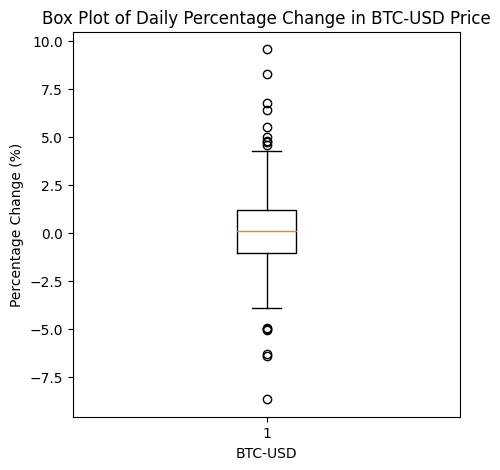

In [54]:
plt.figure(figsize=(5,5))

plt.boxplot(df_btc_usd['Auto_pct']*100, vert=True)

plt.title('Box Plot of Daily Percentage Change in BTC-USD Price')
plt.ylabel('Percentage Change (%)')
plt.xlabel('BTC-USD')

plt.show()

## Line plot of Cumulative Daily Percentage Change in BTC-USD Price over time

C:\Users\math_\AppData\Local\Temp\ipykernel_1504\3241450464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btc_usd['Cumulative_Auto_pct'] = df_btc_usd['Auto_pct'].cumsum()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


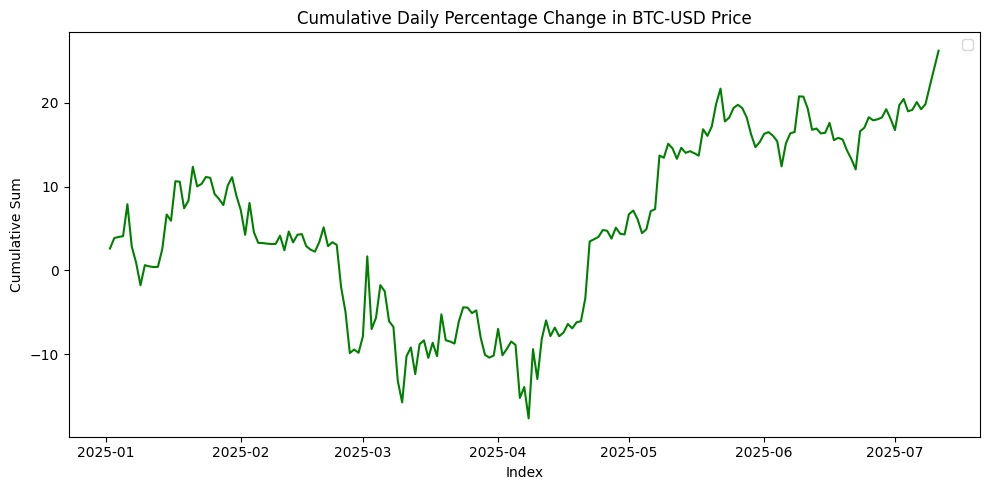

In [55]:
df_btc_usd['Cumulative_Auto_pct'] = df_btc_usd['Auto_pct'].cumsum()

plt.figure(figsize=(10, 5))

plt.plot(df_btc_usd['Date'], df_btc_usd['Cumulative_Auto_pct']*100, linestyle='-', color='green')

plt.title('Cumulative Daily Percentage Change in BTC-USD Price')
plt.xlabel('Index')
plt.ylabel('Cumulative Sum')

plt.legend()
plt.grid(False)

plt.tight_layout()
plt.show()


## Bar plot of Volume over time

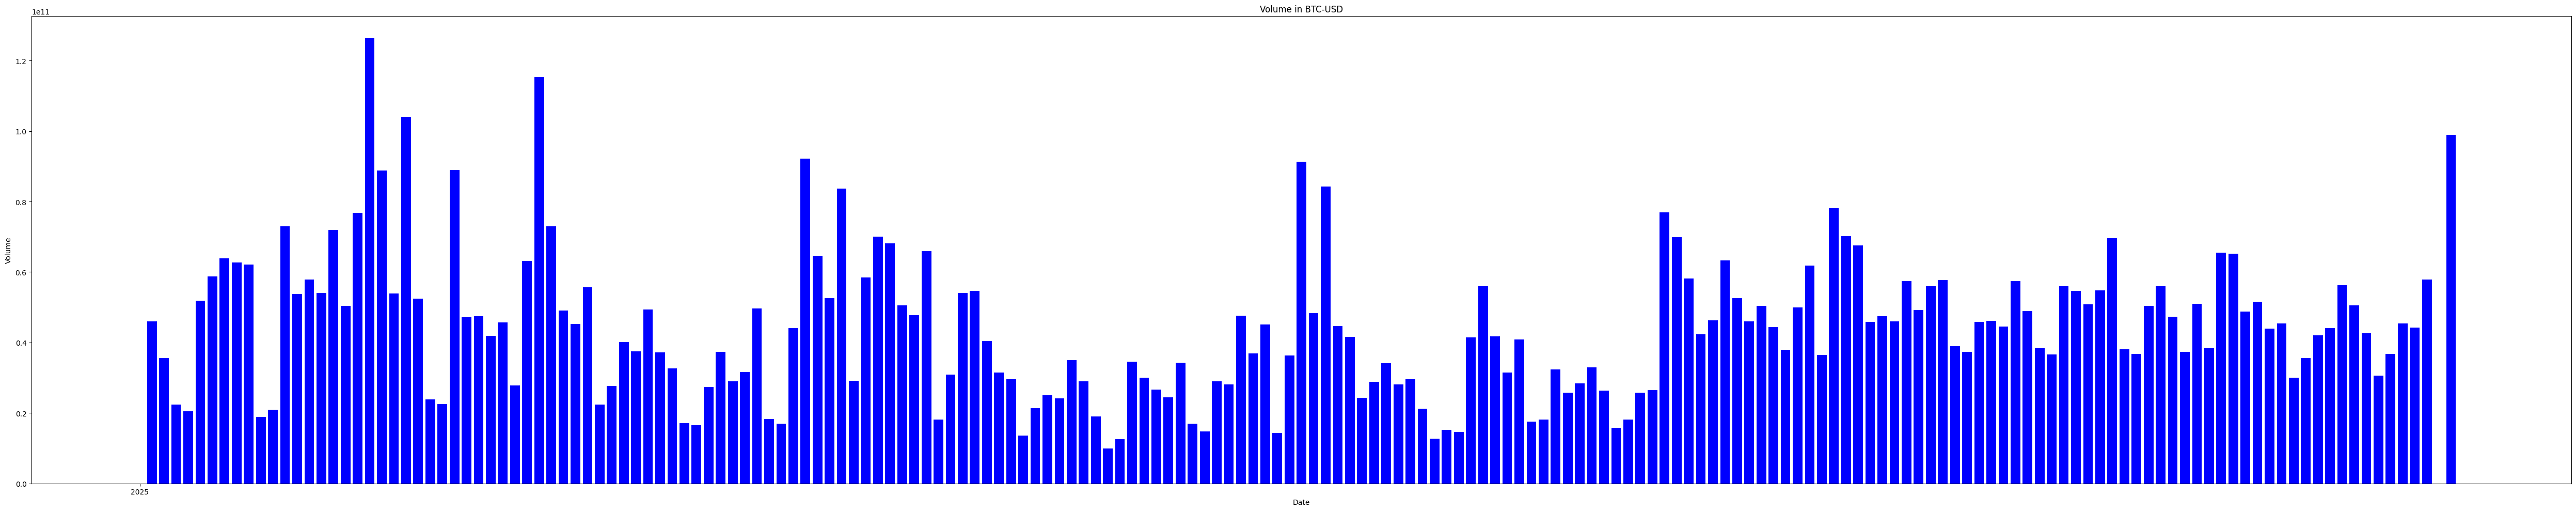

In [56]:
plt.figure(figsize=(50,10))

plt.bar(df_btc_usd['Date'], df_btc_usd['Volume'], color='blue')

plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume in BTC-USD')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()

plt.show()

In [57]:
min_volume = min(df_btc_usd['Volume'])
row_df_min_volume = df_btc_usd.loc[df_btc_usd['Volume'] == min_volume]

display(row_df_min_volume)

,Date,Close,High,Low,Open,Volume,Adj Close,Auto_pct,Cumulative_Auto_pct
80,2025-03-22,83832.484375,84513.875,83674.78125,84046.257812,9863214091,83832.484375,-0.002508,-0.087372


In [58]:
max_volume = max(df_btc_usd['Volume'])
row_df_max_volume = df_btc_usd.loc[df_btc_usd['Volume'] == max_volume]

display(row_df_max_volume)

,Date,Close,High,Low,Open,Volume,Adj Close,Auto_pct,Cumulative_Auto_pct
19,2025-01-20,102016.664062,109114.882812,99471.359375,101083.75,126279678351,102016.664062,0.009171,0.083392


## Blox plot of Volume Trade

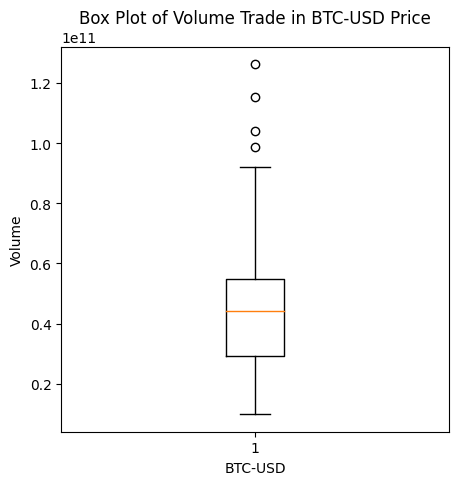

In [59]:
plt.figure(figsize=(5,5))

plt.boxplot(df_btc_usd['Volume'], vert=True)

plt.title('Box Plot of Volume Trade in BTC-USD Price')
plt.ylabel('Volume')
plt.xlabel('BTC-USD')

plt.show()

# Tranding Indicators Test
---

This indicator compare the price moving average of 7 days vs 40 days

When MA 7 > MA 40 = BUY

When MA 7 < MA 40 = SOLD

## Moving Average 7 and 40 days - Trade Strategy

In [60]:
df_MA_trade_btc_usd = df_btc_usd.copy()

In [61]:
# Calculate MA values
df_MA_trade_btc_usd['MA_short'] = df_MA_trade_btc_usd['Adj Close'].rolling(window=7).mean()
df_MA_trade_btc_usd['MA_long'] = df_MA_trade_btc_usd['Adj Close'].rolling(window=40).mean()

# Creating Order column
df_MA_trade_btc_usd['Order'] = 0
df_MA_trade_btc_usd.loc[(df_MA_trade_btc_usd['MA_short'] > df_MA_trade_btc_usd['MA_long']), 'Order'] = 1
df_MA_trade_btc_usd.loc[(df_MA_trade_btc_usd['MA_short'] < df_MA_trade_btc_usd['MA_long']), 'Order'] = -1

# Calculate return
df_MA_trade_btc_usd["MA_return"] = df_MA_trade_btc_usd["Auto_pct"] * df_MA_trade_btc_usd["Order"]

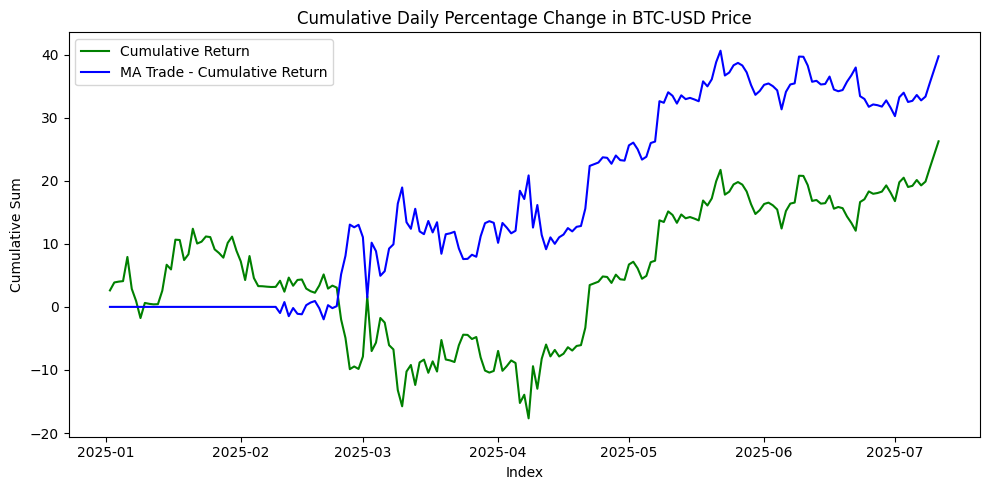

In [62]:
df_MA_trade_btc_usd['Cumulative_MA_return'] = df_MA_trade_btc_usd['MA_return'].cumsum()

plt.figure(figsize=(10, 5))

plt.plot(df_MA_trade_btc_usd['Date'], df_MA_trade_btc_usd['Cumulative_Auto_pct']*100, linestyle='-', color='green', label='Cumulative Return')
plt.plot(df_MA_trade_btc_usd['Date'], df_MA_trade_btc_usd['Cumulative_MA_return']*100, linestyle='-', color='blue', label='MA Trade - Cumulative Return')

plt.title('Cumulative Daily Percentage Change in BTC-USD Price')
plt.xlabel('Index')
plt.ylabel('Cumulative Sum')

plt.legend()
plt.grid(False)

plt.tight_layout()
plt.show()

## Moving Average 7 and 40 days - Buy and Sold Strategy

In [63]:
df_MA_buysold_btc_usd = df_btc_usd.copy()

In [64]:
# Calculate the MA to short and long period
df_MA_buysold_btc_usd['MA_short'] = df_MA_buysold_btc_usd['Adj Close'].rolling(window=7).mean()
df_MA_buysold_btc_usd['MA_long'] = df_MA_buysold_btc_usd['Adj Close'].rolling(window=40).mean()

# Check the positon of MA values with short days as reference
df_MA_buysold_btc_usd['MA_short_over_MA_long'] = (df_MA_buysold_btc_usd['MA_short'] > df_MA_buysold_btc_usd['MA_long'])
df_MA_buysold_btc_usd['MA_short_under_MA_long'] = (df_MA_buysold_btc_usd['MA_short'] < df_MA_buysold_btc_usd['MA_long'])

# Map changes on position
df_MA_buysold_btc_usd['CHANGE_MA'] = (df_MA_buysold_btc_usd['MA_short_over_MA_long'] != df_MA_buysold_btc_usd['MA_short_over_MA_long'].shift(1))

# Crate the ORDER indicator
df_MA_buysold_btc_usd['ORDER'] = '-'

df_MA_buysold_btc_usd.loc[(df_MA_buysold_btc_usd['CHANGE_MA'] == True) & (df_MA_buysold_btc_usd['MA_short_over_MA_long'] == True), 'ORDER'] = 'BUY'
df_MA_buysold_btc_usd.loc[(df_MA_buysold_btc_usd['CHANGE_MA'] == True) & (df_MA_buysold_btc_usd['MA_short_under_MA_long'] == True), 'ORDER'] = 'SOLD'

# Calculate the return after the SOLD

df_MA_buysold_return = df_MA_buysold_btc_usd[df_MA_buysold_btc_usd['ORDER'] != '-']

df_MA_buysold_return.loc[(df_MA_buysold_return['ORDER'] == 'SOLD'), 'Return'] = ((df_MA_buysold_return['Adj Close']/df_MA_buysold_return['Adj Close'].shift(1))-1)

df_MA_buysold_return.fillna(0, inplace=True)

# Merge the return with the MA database

df_MA_buysold_btc_usd = pd.merge(df_MA_buysold_btc_usd, df_MA_buysold_return[['Date', 'Return']], on='Date', how='left')

df_MA_buysold_btc_usd.fillna(0, inplace=True)

C:\Users\math_\AppData\Local\Temp\ipykernel_1504\4249265192.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MA_buysold_return.loc[(df_MA_buysold_return['ORDER'] == 'SOLD'), 'Return'] = ((df_MA_buysold_return['Adj Close']/df_MA_buysold_return['Adj Close'].shift(1))-1)
C:\Users\math_\AppData\Local\Temp\ipykernel_1504\4249265192.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MA_buysold_return.fillna(0, inplace=True)


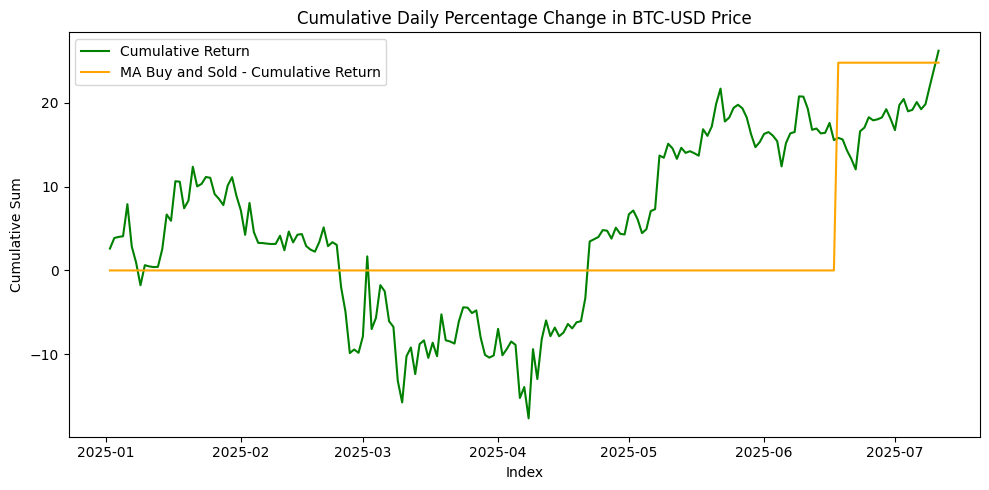

In [65]:
df_MA_buysold_btc_usd['Cumulative_MA_return'] = df_MA_buysold_btc_usd['Return'].cumsum()

plt.figure(figsize=(10, 5))

plt.plot(df_MA_buysold_btc_usd['Date'], df_MA_buysold_btc_usd['Cumulative_Auto_pct']*100, linestyle='-', color='green', label='Cumulative Return')
plt.plot(df_MA_buysold_btc_usd['Date'], df_MA_buysold_btc_usd['Cumulative_MA_return']*100, linestyle='-', color='orange', label='MA Buy and Sold - Cumulative Return')

plt.title('Cumulative Daily Percentage Change in BTC-USD Price')
plt.xlabel('Index')
plt.ylabel('Cumulative Sum')

plt.legend()
plt.grid(False)

plt.tight_layout()
plt.show()


# Comparing returns

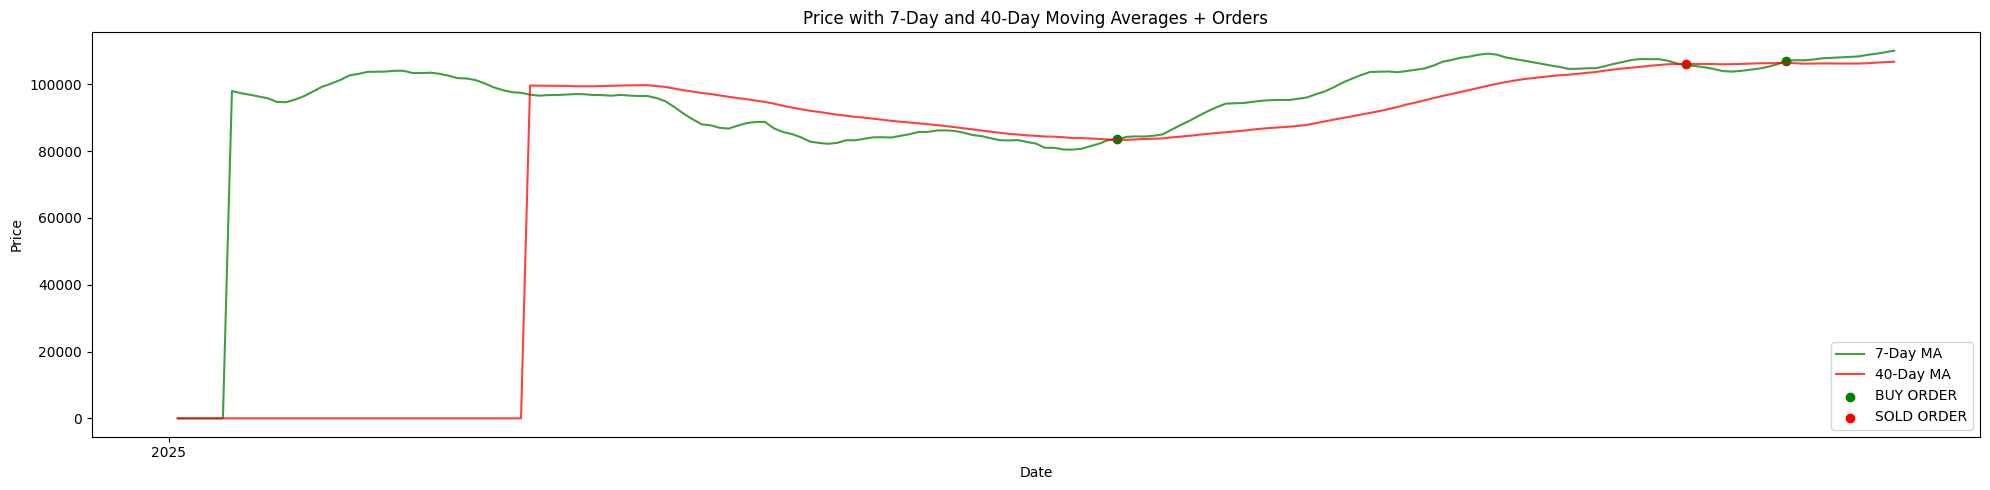

In [66]:
plt.figure(figsize=(20, 5))

plt.plot(df_MA_buysold_btc_usd['Date'], df_MA_buysold_btc_usd['MA_short'], label='7-Day MA', color='green', alpha=0.75)
plt.plot(df_MA_buysold_btc_usd['Date'], df_MA_buysold_btc_usd['MA_long'], label='40-Day MA', color='red', alpha=0.75)

# Target the BUY points
high_points = df_MA_buysold_btc_usd[df_MA_buysold_btc_usd['ORDER'] == 'BUY']
plt.scatter(high_points['Date'], high_points['MA_short'], color='green', marker='o', label='BUY ORDER')

# Target the SOLD points
low_points = df_MA_buysold_btc_usd[df_MA_buysold_btc_usd['ORDER'] == 'SOLD']
plt.scatter(low_points['Date'], low_points['MA_long'], color='red', marker='o', label='SOLD ORDER')

plt.title('Price with 7-Day and 40-Day Moving Averages + Orders')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.grid(False)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()

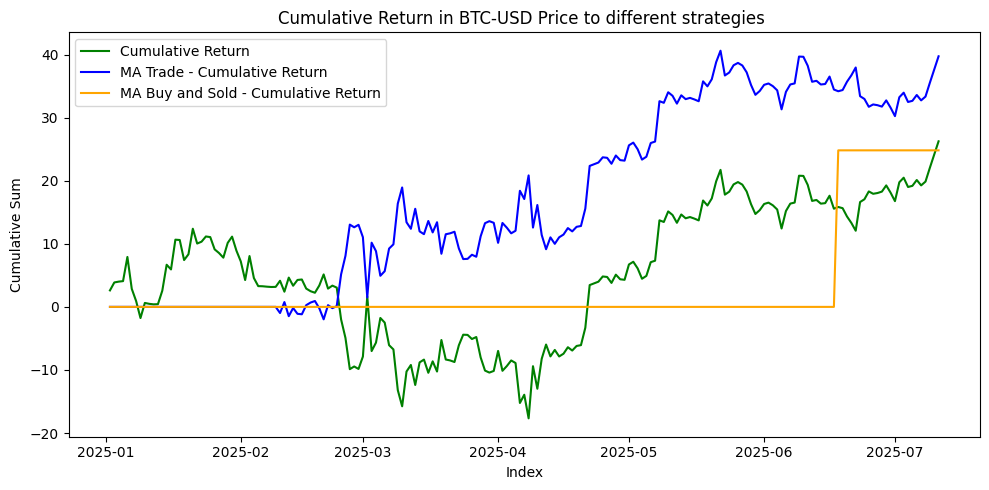

In [67]:
df_MA_buysold_btc_usd['Cumulative_MA_return'] = df_MA_buysold_btc_usd['Return'].cumsum()

plt.figure(figsize=(10, 5))

plt.plot(df_MA_buysold_btc_usd['Date'], df_MA_buysold_btc_usd['Cumulative_Auto_pct']*100, linestyle='-', color='green', label='Cumulative Return')
plt.plot(df_MA_trade_btc_usd['Date'], df_MA_trade_btc_usd['Cumulative_MA_return']*100, linestyle='-', color='blue', label='MA Trade - Cumulative Return')
plt.plot(df_MA_buysold_btc_usd['Date'], df_MA_buysold_btc_usd['Cumulative_MA_return']*100, linestyle='-', color='orange', label='MA Buy and Sold - Cumulative Return')

plt.title('Cumulative Return in BTC-USD Price to different strategies ')
plt.xlabel('Index')
plt.ylabel('Cumulative Sum')

plt.legend()
plt.grid(False)

plt.tight_layout()
plt.show()


BTC percent return over the days = 617,9099 %

BTC percent return with MA Trade Strategy = 735,9885 %

BTC percent return with MA Buy and Sold Strategy = 840,8983 %